<a href="https://colab.research.google.com/github/Tomas-Pompa/Data-science/blob/main/HW_10_ds_practicum_ex_ml_pipeline_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Pipeline

<a href="https://colab.research.google.com/github/simecek/dspracticum2023/blob/main/lesson10/ds_practicum_ex_ml_pipeline_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset `titanic`: https://www.kaggle.com/competitions/titanic/data

Dataset `spaceship-titanic`: https://www.kaggle.com/competitions/spaceship-titanic/data

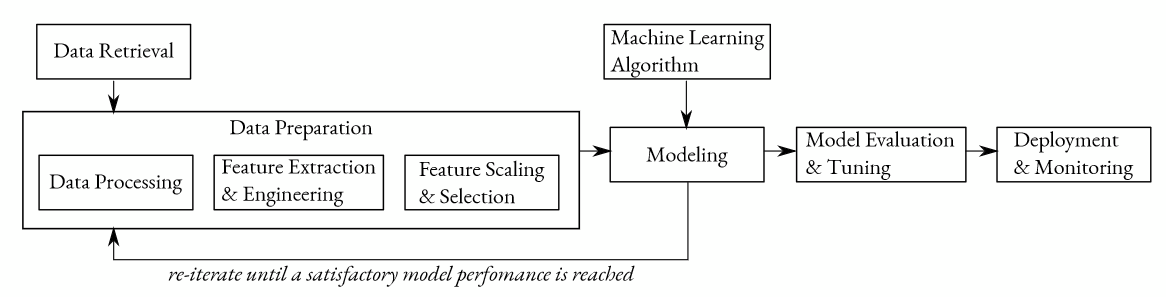

Download the dataset:

In [1]:
import os

os.environ['KAGGLE_USERNAME'] = 'amllogin'
os.environ['KAGGLE_KEY'] = '35eca611ac64064016cba986e2161cdd'

######################################################
# TODO: choose a dataset - Titanic or Space Titanic: #
######################################################
# DATASET = 'titanic'
DATASET = 'spaceship-titanic'

!kaggle competitions download -c {DATASET} -p {'.'}

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 106MB/s]


In [2]:
import zipfile

dataset_path = '/content/data_preparation_exercise/'


with zipfile.ZipFile(DATASET + '.zip', 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

In [3]:
import pandas as pd

csv_filepath = dataset_path + 'train.csv'
df = pd.read_csv(csv_filepath)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## 0. Data Exploration


In [4]:
######################################
# TODO: get insights to your dataset #
######################################

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [8]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

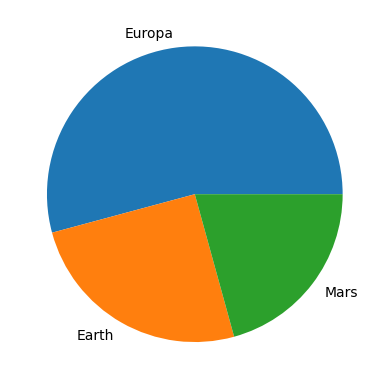

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [9]:
import matplotlib.pyplot as plt

plt.pie(df['HomePlanet'].value_counts(), labels = list(df['HomePlanet'].unique())[0:3])
plt.show()

df['HomePlanet'].value_counts()

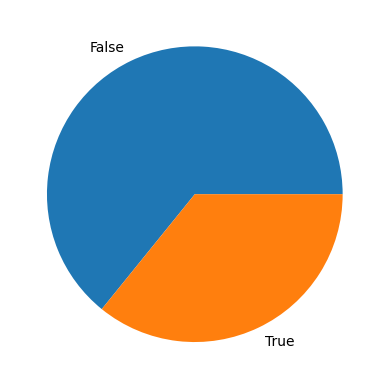

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [10]:
plt.pie(df['CryoSleep'].value_counts(), labels = list(df['CryoSleep'].unique())[0:2])
plt.show()

df['CryoSleep'].value_counts()

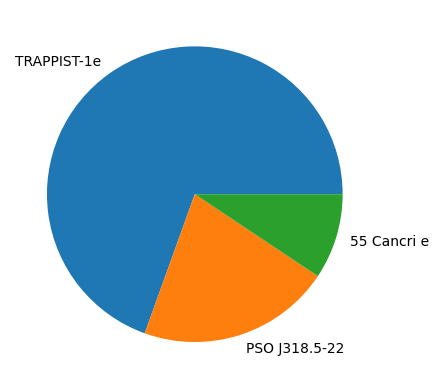

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [11]:
plt.pie(df['Destination'].value_counts(), labels = list(df['Destination'].unique())[0:3])
plt.show()

df['Destination'].value_counts()

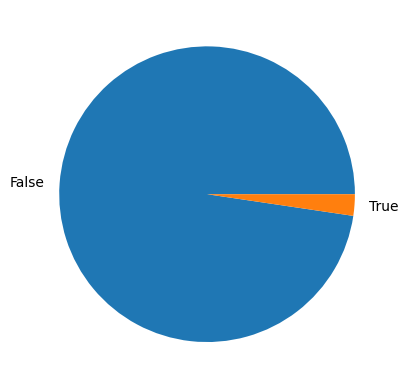

False    8291
True      199
Name: VIP, dtype: int64

In [12]:
plt.pie(df['VIP'].value_counts(), labels = list(df['VIP'].unique())[0:2])
plt.show()

df['VIP'].value_counts()

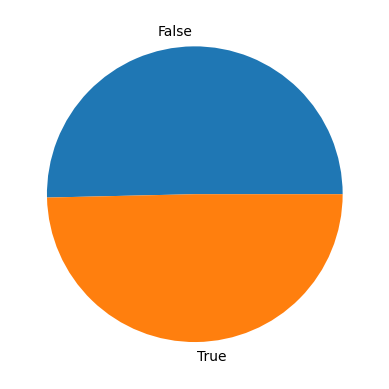

True     4378
False    4315
Name: Transported, dtype: int64

In [13]:
plt.pie(df['Transported'].value_counts(), labels = list(df['Transported'].unique())[0:2])
plt.show()

df['Transported'].value_counts()

Numerical variables

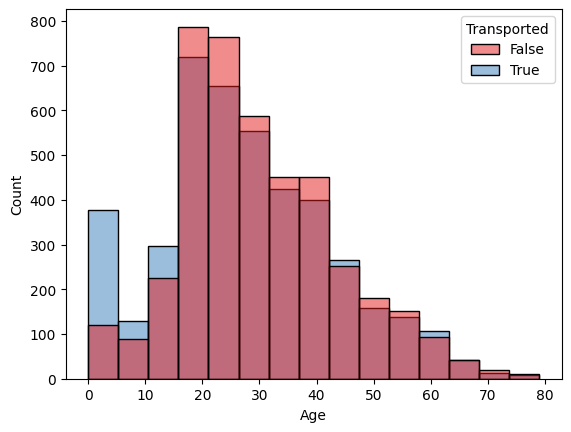

In [14]:
import seaborn as sns

sns.histplot(data = df, x = 'Age', palette='Set1', hue = 'Transported',
             bins = 15)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

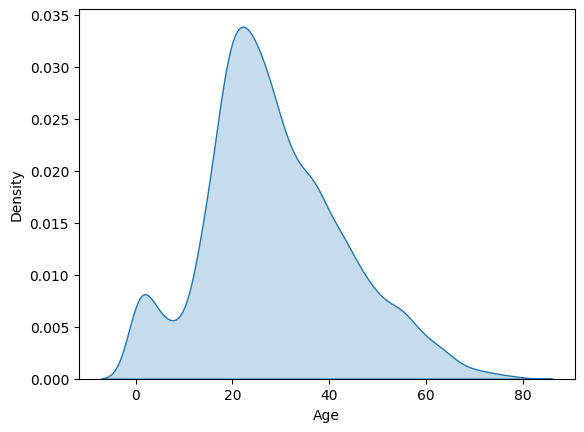

In [15]:
sns.kdeplot(df['Age'], fill = True)

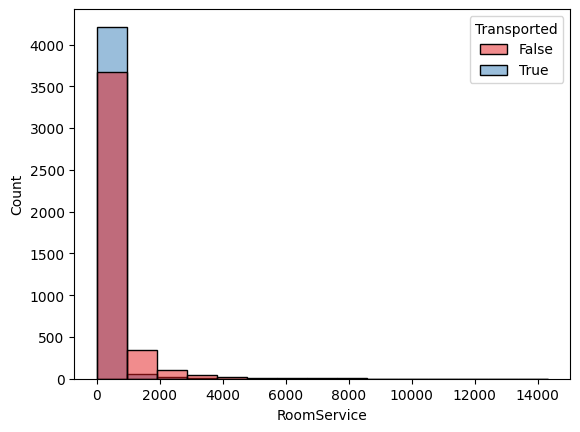

In [16]:
sns.histplot(data = df, x = 'RoomService', palette='Set1', hue = 'Transported',
             bins = 15)
plt.show()

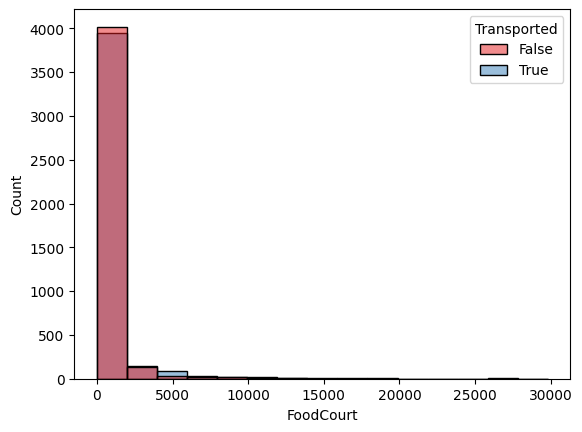

In [17]:
sns.histplot(data = df, x = 'FoodCourt', palette='Set1', hue = 'Transported',
             bins = 15)
plt.show()

## 1. Data Cleaning

In [18]:
###########################
# TODO: handle duplicates #
###########################

In [19]:
df.loc[df.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


No duplicates were found.

In [20]:
df.duplicated(['PassengerId']).sum()

0

All IDs are unique.

In [21]:
#############################
# TODO: handle missing data #
#############################

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are few missing data in all features except the target (`Transported`) and `PassengerId`.

In [23]:
# imputing missing age by mean value
df['Age'].fillna(int(df['Age'].mean(numeric_only=True)), inplace=True)

Because more than half of all passengers have zero bill in variables `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`, we impute missing data by 0.

In [24]:
# imputing missing RoomService, FoodCourt, ShoppingMall, Spa, VRDeck by zero
df['RoomService'].fillna(0, inplace=True)
df['FoodCourt'].fillna(0, inplace=True)
df['ShoppingMall'].fillna(0, inplace=True)
df['Spa'].fillna(0, inplace=True)
df['VRDeck'].fillna(0, inplace=True)

In [25]:
# in analysis we do not need the column name, therefore we are not worried about missing data here

In [26]:
# there are only few VIP`s ... imputing missing values by False
df['VIP'].fillna(False, inplace=True)

In [27]:
# imputing by none
df['HomePlanet'].fillna('None', inplace=True)
df['CryoSleep'].fillna('None', inplace=True)
df['Cabin'].fillna('None', inplace=True)
df['Destination'].fillna('None', inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(2), float64(6), object(6)
memory usage: 832.1+ KB


## 2. Feature manipulation

#### Categorical features encoding:

(`object` type from `df.info()`)

In [29]:
df_transformed = df.copy()

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):
    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns
        return result

In [31]:
#####################################
# TODO: encode categorical features #
#####################################

In [32]:
df_transformed['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
None       201
Name: HomePlanet, dtype: int64

In [33]:
ohe_status = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_status_df = pd.DataFrame(ohe_status.fit_transform(df_transformed[['HomePlanet']]))
df_transformed = df_transformed.join(ohe_status_df)

Index(['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_None'],
      dtype='object')


In [34]:
df_transformed['CryoSleep'].value_counts()

False    5439
True     3037
None      217
Name: CryoSleep, dtype: int64

In [35]:
ohe_status = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_status_df = pd.DataFrame(ohe_status.fit_transform(df_transformed[['CryoSleep']]))
df_transformed = df_transformed.join(ohe_status_df)

Index(['CryoSleep_False', 'CryoSleep_True', 'CryoSleep_None'], dtype='object')


In [36]:
df_transformed['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
None              182
Name: Destination, dtype: int64

In [37]:
ohe_status = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_status_df = pd.DataFrame(ohe_status.fit_transform(df_transformed[['Destination']]))
df_transformed = df_transformed.join(ohe_status_df)

Index(['Destination_55 Cancri e', 'Destination_None',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')


#### Numerical feature scaling:

In [38]:
##################################
# TODO: scale numerical features #
##################################

In [39]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
numerical_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [40]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler(copy=True)
df_transformed.loc[:,numerical_features] = standard_scaler.fit_transform(df_transformed[numerical_features])
df_transformed.loc[:,numerical_features]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.710602,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003
1,-0.335517,-0.168073,-0.275387,-0.241771,0.217158,-0.224205
2,2.035686,-0.268001,1.959998,-0.283579,5.695623,-0.219796
3,0.292154,-0.333105,0.523010,0.336851,2.687176,-0.092818
4,-0.893447,0.125652,-0.237159,-0.031059,0.231374,-0.261240
...,...,...,...,...,...,...
8688,0.850085,-0.333105,3.992336,-0.283579,1.189173,-0.197751
8689,-0.753965,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003
8690,-0.196035,-0.333105,-0.281027,2.846999,-0.269737,-0.263003
8691,0.222413,-0.333105,0.376365,-0.283579,0.043013,2.589576


## 3. Feature Selection

In [41]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

<ipython-input-41-935c2e534e54>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.091709,0.068520,0.127370,0.032984,0.121020,0.099573,-0.074245
VIP,0.091709,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261
RoomService,0.068520,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,0.127370,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.032984,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,0.121020,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545
VRDeck,0.099573,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874
Transported,-0.074245,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000


In [42]:
##############################################################
# TODO: choose what features will be used to build the model #
##############################################################

In [43]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   HomePlanet                 8693 non-null   object 
 2   CryoSleep                  8693 non-null   object 
 3   Cabin                      8693 non-null   object 
 4   Destination                8693 non-null   object 
 5   Age                        8693 non-null   float64
 6   VIP                        8693 non-null   bool   
 7   RoomService                8693 non-null   float64
 8   FoodCourt                  8693 non-null   float64
 9   ShoppingMall               8693 non-null   float64
 10  Spa                        8693 non-null   float64
 11  VRDeck                     8693 non-null   float64
 12  Name                       8493 non-null   object 
 13  Transported                8693 non-null   bool 

We use only encoded and transformed features. We drop `Name` and `Cabin` features and also `PassengerId`.

In [44]:
df_transformed.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)

In [45]:
df_transformed.drop(['HomePlanet', 'CryoSleep', 'Destination'], axis=1, inplace=True)

## 5. Splitting data to train and test sets (dataset sampling)

In [46]:
#########################################################################
# TODO: split the data to train and test sets (the real test set is not #
# available for us before submission)                                   #
# for 'titanic' dataset, we are predicting the 'Survived' column,       #
# for 'spaceship-titanic' the 'Transported' column                      #
#########################################################################

In [47]:
X = df_transformed[['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'HomePlanet_None', 'CryoSleep_False',
       'CryoSleep_True', 'CryoSleep_None', 'Destination_55 Cancri e',
       'Destination_None', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e']]
Y = df_transformed['Transported']

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=21)
y_train.value_counts()

True     3273
False    3246
Name: Transported, dtype: int64

In [49]:
y_test.value_counts()

True     1105
False    1069
Name: Transported, dtype: int64

## 6. Model

In [50]:
#############################################################################
# TODO: propose some appropriate solution and give reasoning why it is      #
# suitable to be used here (+ discuss at least one other approach you could #
# have taken instead) and train the model                                   #
# - try to reach 80%+ accuracy on your test set                             #
#############################################################################

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Logistic Regression

We can use simple Logistic Regression for modelling the target of two classes $-$ `True` and `False`. This model has no hyperparameters to be chosen so it is easy to use it.

Accuracy: 79.255 %


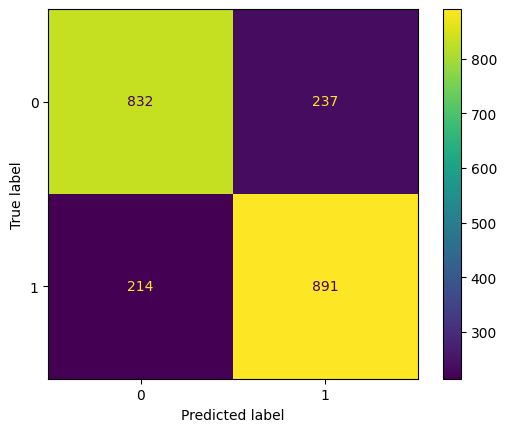

In [52]:
classifier_lr = LogisticRegression(random_state=42)
classifier_lr.fit(x_train, y_train)

predicted = classifier_lr.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, predicted)*100:.5} %')

cm = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

### SVM

Another method for classification is Support vector machines $-$ we have to choose the kernel (linear, polynomial or radial basis function = Gaussian) and appropriate hyperparameters.

In [53]:
from sklearn.svm import SVC

In [54]:
classifier_svc = SVC(C=4,
                     kernel='rbf',
                     gamma=0.06)

In [55]:
classifier_svc.fit(x_train, y_train)

SVC(C=4, gamma=0.06)

In [56]:
score = classifier_svc.score(x_test, y_test)
score

0.7939282428702852

### Random Forest

We are close to $80\,\%$ accuracy, but we are not able to reach that threshold, therefore we try to use random forest classifier.

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
classifier_rf = RandomForestClassifier(random_state=42,
                                       max_depth=10,
                                       n_estimators=1000,
                                       min_samples_leaf=10)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=1000,
                       random_state=42)

Accuracy: 80.313 %


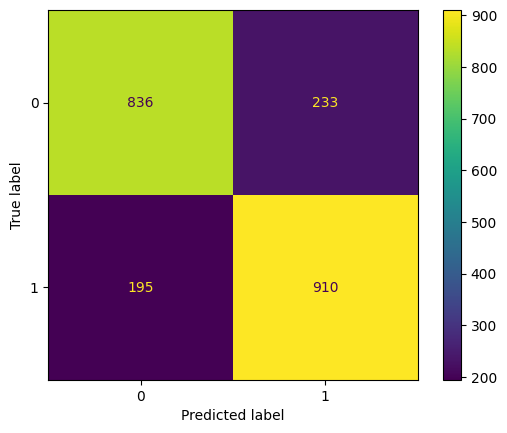

In [59]:
predicted = classifier_rf.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, predicted)*100:.5} %')

cm = confusion_matrix(y_test, predicted)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

## 7. Interpretation

In [60]:
##############################################################################
# TODO: interpret your model - describe what are the most important features #
# for its decisions                                                          #
##############################################################################

In [61]:
import time
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(classifier_rf,
                                x_test,
                                y_test,
                                n_repeats=30,
                                random_state=21,
                                n_jobs=2)

elapsed_time = time.time() - start_time
print(f'Elapsed time to compute the importances: {elapsed_time:.3f} seconds')

result

Elapsed time to compute the importances: 169.867 seconds


{'importances_mean': array([ 1.64520086e-02, -4.44648881e-04,  1.94418890e-02,  3.63845446e-02,
         1.70806501e-02,  3.19687213e-02,  3.09567617e-02,  8.58632321e-04,
         1.33394664e-03, -6.13308801e-04, -1.53327200e-05,  1.60993560e-03,
         4.13983441e-03, -1.53327200e-05,  9.04630481e-04,  3.06654400e-05,
         3.83318001e-04,  8.43299601e-04]),
 'importances_std': array([2.28354601e-03, 8.25692243e-05, 3.86299353e-03, 3.45517326e-03,
        2.13361837e-03, 4.15810816e-03, 3.27234157e-03, 1.51971931e-03,
        2.23568725e-03, 1.34018849e-03, 1.87159700e-04, 1.79235497e-03,
        2.72646633e-03, 2.21662562e-04, 1.05216427e-03, 1.14739570e-04,
        6.18081704e-04, 1.02912139e-03]),
 'importances': array([[ 0.01517939,  0.01379945,  0.01793928,  0.01425943,  0.0174793 ,
          0.0174793 ,  0.01701932,  0.01609936,  0.01609936,  0.01655934,
          0.02023919,  0.01379945,  0.01655934,  0.02115915,  0.02069917,
          0.01471941,  0.01793928,  0.01517939

In [63]:
feature_importances = pd.Series(result.importances_mean, index=X.columns)
feature_importances

Age                          0.016452
VIP                         -0.000445
RoomService                  0.019442
FoodCourt                    0.036385
ShoppingMall                 0.017081
Spa                          0.031969
VRDeck                       0.030957
HomePlanet_Earth             0.000859
HomePlanet_Europa            0.001334
HomePlanet_Mars             -0.000613
HomePlanet_None             -0.000015
CryoSleep_False              0.001610
CryoSleep_True               0.004140
CryoSleep_None              -0.000015
Destination_55 Cancri e      0.000905
Destination_None             0.000031
Destination_PSO J318.5-22    0.000383
Destination_TRAPPIST-1e      0.000843
dtype: float64

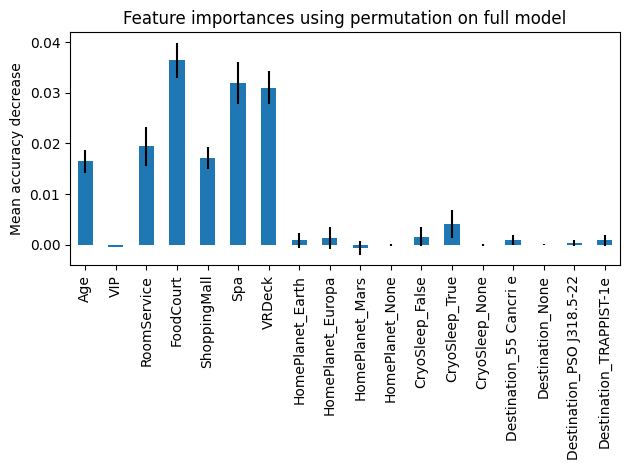

In [72]:
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title('Feature importances using permutation on full model')
ax.set_ylabel('Mean accuracy decrease')
fig.tight_layout()
plt.show()

The most important features for random forest classification are all luxury amenities $-$ `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`. `Age` is also important feature. On the other hand, `Destination` and `HomePlanet` do not seem to have much impact on target.